In [1]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

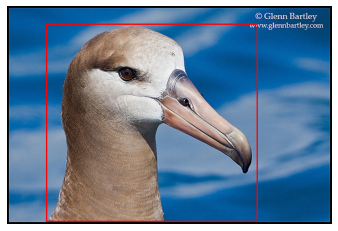

In [2]:
image_path = "/work/li.baol/data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg"

# Open the image
img = Image.open(image_path)

# Create a drawing object
draw = ImageDraw.Draw(img)

# Draw the bounding box
# The bounding_box is expected to be in the format (x, y, width, height)
x, y, width, height = (60.0, 27.0, 325.0, 304.0)
draw.rectangle([x, y, x + width, y + height], outline="red", width=2)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()


In [3]:
data_path = "/work/li.baol/data/CUB_200_2011"
# make dir if not exist
from pathlib import Path
Path("YOLOv6/bird_data").mkdir(parents=True, exist_ok=True)
Path("YOLOv6/bird_data/images/train").mkdir(parents=True, exist_ok=True)
Path("YOLOv6/bird_data/images/val").mkdir(parents=True, exist_ok=True)
Path("YOLOv6/bird_data/labels/train").mkdir(parents=True, exist_ok=True)
Path("YOLOv6/bird_data/labels/val").mkdir(parents=True, exist_ok=True)

In [4]:
# read txt file
import pandas as pd
train_test_split = pd.read_csv(data_path + "/train_test_split.txt", sep=" ", header=None)
images = pd.read_csv(data_path + "/images.txt", sep=" ", header=None)
classes = pd.read_csv(data_path + "/classes.txt", sep=" ", header=None)
image_class_labels = pd.read_csv(data_path + "/image_class_labels.txt", sep=" ", header=None)
bounding_boxes = pd.read_csv(data_path + "/bounding_boxes.txt", sep=" ", header=None)

num_of_images = len(images)
num_of_images

11788

In [5]:
import shutil
for i in range(num_of_images):
    image_name = images.iloc[i][1]
    image_class = image_class_labels.iloc[i][1] - 1 # starts from 0
    image_path = data_path + "/images/" + image_name
    # open image
    img = Image.open(image_path)
    img_width, img_height = img.size
    x, y, box_width, box_height = bounding_boxes.iloc[i][1:]
    # normalize
    x = round(x / img_width, 3)
    y = round(y / img_height, 3)
    width = round(box_width / img_width, 3)
    height = round(box_height / img_height, 3)
    x = round(x + width / 2, 3)
    y = round(y + height / 2, 3)
    # save image
    if train_test_split.iloc[i][1] == 1:
        # copy to train
        shutil.copy(image_path, f"YOLOv6/bird_data/images/train/img{i}.jpg")        
        with open(f"YOLOv6/bird_data/labels/train/img{i}.txt", "w") as f:
            f.write(str(image_class) + " " + str(x) + " " + str(y) + " " + str(width) + " " + str(height))        
    else:
        # copy to val
        shutil.copy(image_path, f"YOLOv6/bird_data/images/val/img{i}.jpg")      
        with open(f"YOLOv6/bird_data/labels/val/img{i}.txt", "w") as f:
            f.write(str(image_class) + " " + str(x) + " " + str(y) + " " + str(width) + " " + str(height))          

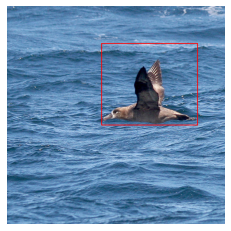

In [6]:
image_path = "/work/li.baol/GIT/deep_learning_class/hw3/YOLOv6/bird_data/images/train/img36.jpg"
label_path = "/work/li.baol/GIT/deep_learning_class/hw3/YOLOv6/bird_data/labels/train/img36.txt"

# Open the image
img = Image.open(image_path)

# Create a drawing object
draw = ImageDraw.Draw(img)

# Draw the bounding box
# The bounding_box is expected to be in the format (x, y, width, height)
with open(label_path) as f:
    label = f.readline()
    label = label.split()
    label = [float(i) for i in label]
    image_class, x, y, width, height = label
    x = x * img.size[0]
    y = y * img.size[1]
    width = width * img.size[0]
    height = height * img.size[1]
draw.rectangle([x-width/2, y-width/2, x + width/2, y + height/2], outline="red", width=2)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()


In [8]:
# write yaml file
import yaml

# open file
with open("YOLOv6/data/bird_data.yaml", 'w') as f:
    # define
    data = dict(
        train = "bird_data/images/train",
        val = "bird_data/images/val",
        is_coco = False,
        nc = 200,
        names = classes.iloc[:, 1].tolist()
    )
    # write
    yaml.dump(data, f)